In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | fianarantsoa
Processing Record 3 of Set 1 | ballina
Processing Record 4 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | margate
Processing Record 14 of Set 1 | west bay
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | sosua
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 

Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | longlac
City not found. Skipping...
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | dodge city
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | muriwai beach
Processing Record 50 of Set 4 | vila velha
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | sladkovo
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | troy
Processing Record 7 of Set 5 | lotofaga
Processing Record 8 of Set 5 | cam pha
City not found. Skipping...
Processing Record 9 of Set 5 | cabanas
Processing Record 10 of Set 5 | rassvet
Processing Record 11 of Set 5 | suluq
Processing Record 12 of Set 5 | eyl
Processing Record 13 of Set 5 | wawa
Processing Record 14 of Set 5 | mayo
Processin

Processing Record 31 of Set 8 | newcastle
Processing Record 32 of Set 8 | sioux lookout
Processing Record 33 of Set 8 | ust-kuyga
Processing Record 34 of Set 8 | sibolga
Processing Record 35 of Set 8 | shimoda
Processing Record 36 of Set 8 | guntakal
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | oistins
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | dali
Processing Record 41 of Set 8 | cauquenes
Processing Record 42 of Set 8 | konstantinovka
Processing Record 43 of Set 8 | falealupo
City not found. Skipping...
Processing Record 44 of Set 8 | kaeo
Processing Record 45 of Set 8 | bihariganj
Processing Record 46 of Set 8 | findlay
Processing Record 47 of Set 8 | sao joao da barra
Processing Record 48 of Set 8 | lakes entrance
Processing Record 49 of Set 8 | bhag
Processing Record 50 of Set 8 | aktash
Processing Record 1 of Set 9 | college
Processing Record 2 of Set 9 | alice springs
Processing Record 3 of Set 9 | abha
Processing Record 4 

Processing Record 19 of Set 12 | susanville
Processing Record 20 of Set 12 | durango
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | mbuji-mayi
Processing Record 23 of Set 12 | totma
Processing Record 24 of Set 12 | shagonar
Processing Record 25 of Set 12 | myitkyina
Processing Record 26 of Set 12 | agirish
Processing Record 27 of Set 12 | cimarron hills
Processing Record 28 of Set 12 | touros
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | mapiripan
Processing Record 31 of Set 12 | tocopilla
Processing Record 32 of Set 12 | kenai
Processing Record 33 of Set 12 | zarechnyy
Processing Record 34 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 35 of Set 12 | nizwa
Processing Record 36 of Set 12 | malwan
City not found. Skipping...
Processing Record 37 of Set 12 | grand gaube
Processing Record 38 of Set 12 | marsh harbour
Processing Record 39 of Set 12 | ulaangom
Processing Record 40 of Set 12 | yulara
Proces

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bandarbeyla,9.4942,50.8122,81.43,59,47,26.26,SO,2021-08-07 04:36:24
1,Fianarantsoa,-21.4333,47.0833,54.75,75,0,2.10,MG,2021-08-07 04:36:24
2,Ballina,-28.8667,153.5667,73.58,60,0,10.36,AU,2021-08-07 04:36:25
3,Port Alfred,-33.5906,26.8910,55.17,83,0,4.05,ZA,2021-08-07 04:36:25
4,Hobart,-42.8794,147.3294,50.05,67,75,4.00,AU,2021-08-07 04:36:26
5,Hasaki,35.7333,140.8333,84.49,78,100,7.72,JP,2021-08-07 04:36:26
6,Airai,-8.9266,125.4092,75.15,36,74,4.65,TL,2021-08-07 04:36:27
7,Khatanga,71.9667,102.5000,60.57,45,64,10.89,RU,2021-08-07 04:36:27
8,Longyearbyen,78.2186,15.6401,48.04,71,75,8.05,SJ,2021-08-07 04:36:27
9,Margate,51.3813,1.3862,61.30,87,52,1.99,GB,2021-08-07 04:35:24


In [19]:
new_column_order = ["City" , "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bandarbeyla,SO,2021-08-07 04:36:24,9.4942,50.8122,81.43,59,47,26.26
1,Fianarantsoa,MG,2021-08-07 04:36:24,-21.4333,47.0833,54.75,75,0,2.10
2,Ballina,AU,2021-08-07 04:36:25,-28.8667,153.5667,73.58,60,0,10.36
3,Port Alfred,ZA,2021-08-07 04:36:25,-33.5906,26.8910,55.17,83,0,4.05
4,Hobart,AU,2021-08-07 04:36:26,-42.8794,147.3294,50.05,67,75,4.00
5,Hasaki,JP,2021-08-07 04:36:26,35.7333,140.8333,84.49,78,100,7.72
6,Airai,TL,2021-08-07 04:36:27,-8.9266,125.4092,75.15,36,74,4.65
7,Khatanga,RU,2021-08-07 04:36:27,71.9667,102.5000,60.57,45,64,10.89
8,Longyearbyen,SJ,2021-08-07 04:36:27,78.2186,15.6401,48.04,71,75,8.05
9,Margate,GB,2021-08-07 04:35:24,51.3813,1.3862,61.30,87,52,1.99


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

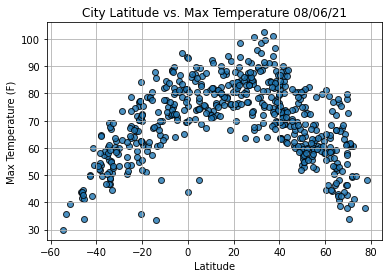

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

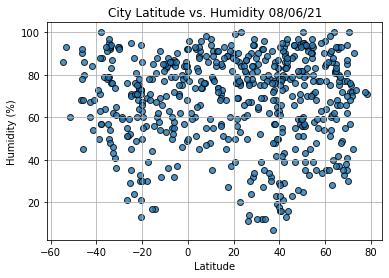

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

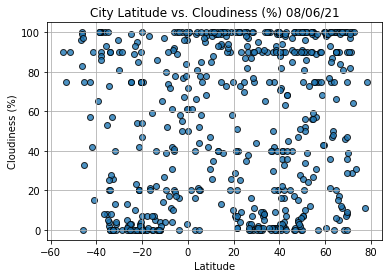

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

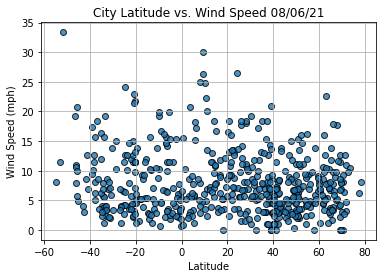

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()